# Tutorial for LossTanGram version 0.1

The primary purpose of this code is to produce the loss tangent attribute from SHARAD data. Inputs to this calculation are radar return data as well as the mapped surface return.

In [2]:
# import the LossTanGram class
from LossTanGram import Make_LossTanGram


# other modules used in this tutorial
import matplotlib.pyplot as plt
import segyio

## From .sgy data

In [3]:
# Beta version 1 supports using segy files exported from Seisware.
# Files that have been created by CO-SHARPS directly are not
# supported. Version 2 will include support for .img files of
# radar data. Different versions/formats of mapped surface return 
# data will also need to be evaluated.

# Note of segy format: export from SeisWare using the 
# StandardSEGY_Rev1.kwd keyword file

# Note on surface return format: can be a .csv or .txt file, 
# but the data is expected to be X, Y, Surface Return TWT

testing_segy_path = "./1000902000_Unix_IBM32.sgy"
horizon_path='./Surface_1000902000.csv'

In [4]:
# Create an instance of the LossTanGram class 
# using the `.from_segy()` method

tutorial_losstangram = Make_LossTanGram.from_segy(testing_segy_path, horizon_filepath=horizon_path)

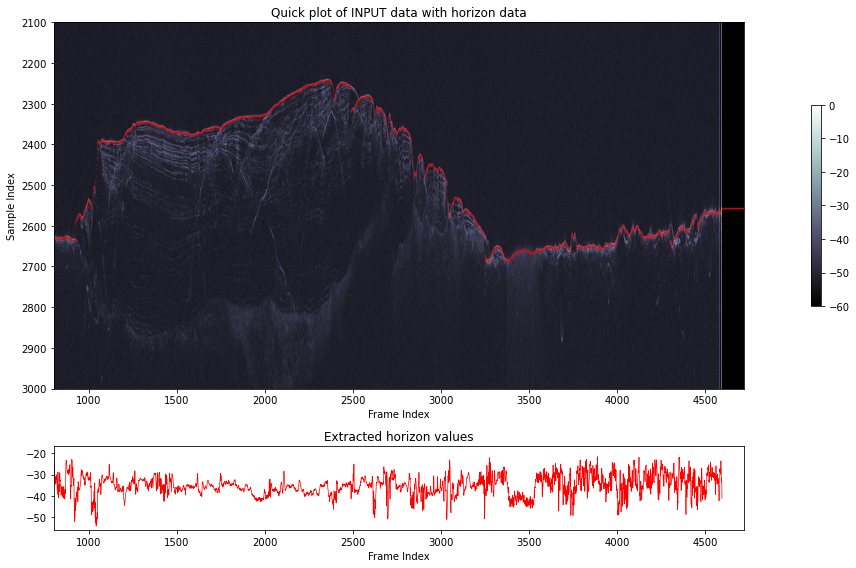

In [4]:
# Create a plot of the input data
# Several optional parameters can be passed to modify the plot

tutorial_losstangram.plot_data(vmin=-60, vmax=0, xlim=(800,None), ylim=(3000,2100))

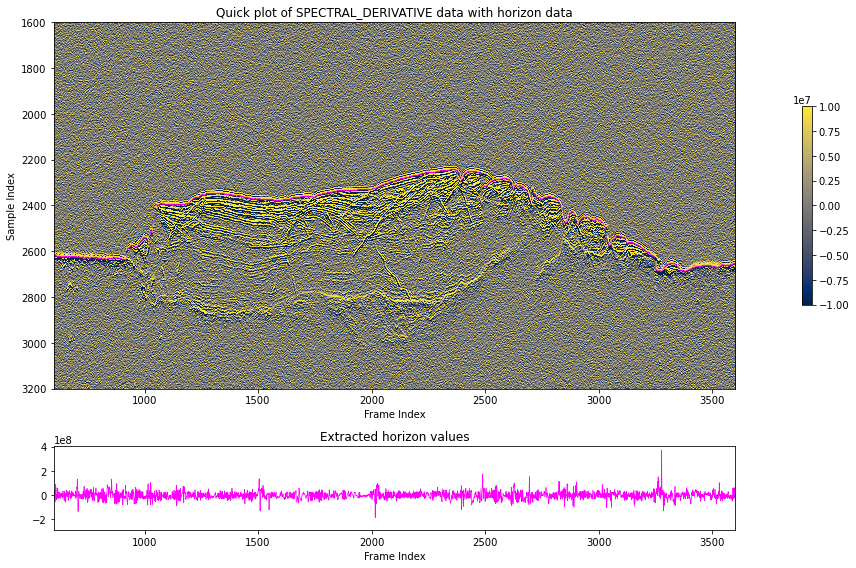


RMS data type: <class 'numpy.ndarray'>


In [5]:
# We can also plot the 'rms' or 'spectral_derivative' data
# using the `data` argument. Computations are ran for each
# plot, but not stored. RMS or Spectral Derivative data can
# be accessed by using the `.rms` or `.spectral_derivative`
# methods

tutorial_losstangram.plot_data(data='spectral_derivative',
                               vmin=-1e7, vmax=1e7,
                               xlim=(600,3600), ylim=(3200,1600),
                               cmap='cividis', horizon_color='magenta')


# Using default parameters will apply the RMS smoother to
# the input data using a filter size of 5
# Note: the RMS calculation is a bit slow
rms_data = tutorial_losstangram.rms()

print("\nRMS data type: {}".format(type(rms_data)))

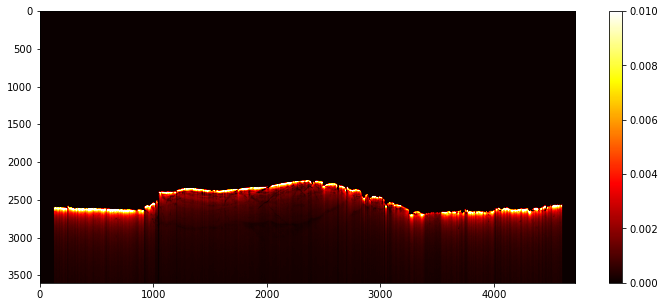

In [5]:
# The `loss_tangent_segy` method by default will apply a RMS smoothing 
# to the input data and return a numpy array of loss tangent values

loss_tangent = tutorial_losstangram.loss_tangent()


plt.figure(figsize=(12,5))
plt.imshow(loss_tangent.T, aspect='auto',vmin=0, vmax=.01, cmap='hot')
plt.colorbar()
plt.show()

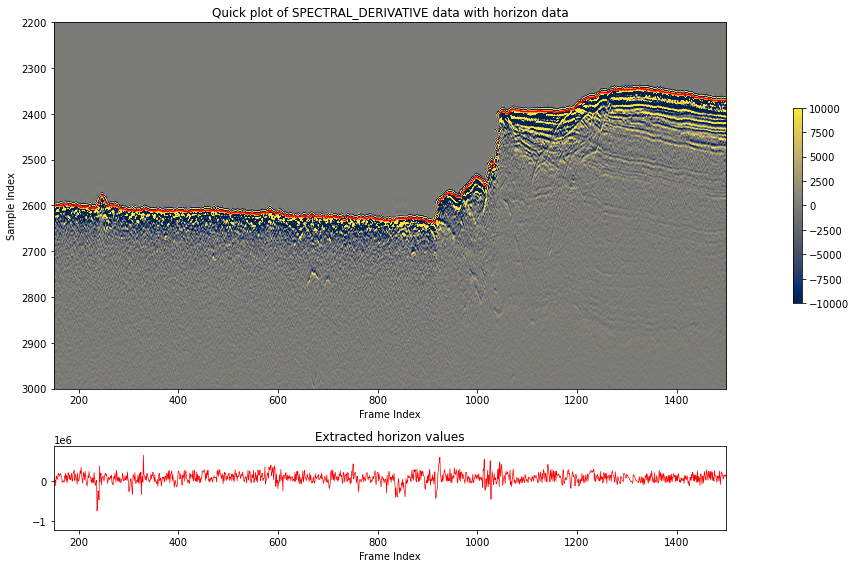

In [22]:
# If we want to view the first spectral derivative of the loss tangent 
# data, we can pass the `arr` argument to the plot method. 


# Be sure to adjust the amplitude min and max values accordingly,
# this example makes the horizon more visible with the alpha
# and size arguments


tutorial_losstangram.plot_data(data='spectral_derivative',
                               arr = loss_tangent,
                               vmin=-1e4, vmax=1e4,
                               xlim=(150,1500), ylim=(3000,2200),
                               cmap='cividis', horizon_alpha=1,
                               horizon_size=1)


# This data can also be returned as a numpy array for inspection,
# saving etc. with the line below:

loss_tangent_spec_derivative = tutorial_losstangram.spectral_derivative(arr = loss_tangent)

C:\Users\camos\Anaconda3\envs\geocomp\lib\site-packages\segyio\utils.py:23: RuntimeWarning: Implicit conversion from float64 to float32 (narrowing)
  warnings.warn(msg.format(x.dtype, dtype), RuntimeWarning)


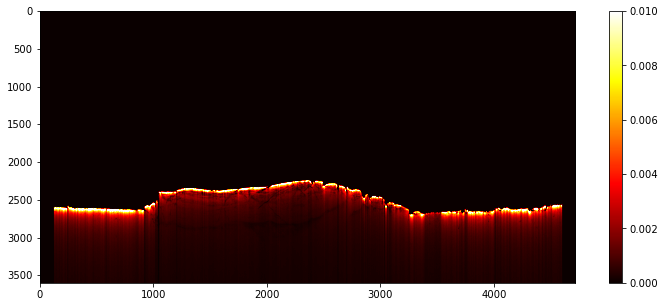

In [7]:
# We can use the `.to_segy` method to write a new .sgy file 
# of loss tangent data (or RMS, Spectral Derivative etc.)

output_segy_filepath = "./losstan_segy_example.sgy"

tutorial_losstangram.to_segy(loss_tangent, output_segy_filepath)


# We'll use `segyio` to open and check the new segy file

with segyio.open(output_segy_filepath, 'r', ignore_geometry=True) as segyfile:
    segy_data = segyio.tools.collect(segyfile.trace[:])
    
plt.figure(figsize=(12,5))
plt.imshow(segy_data.T, aspect='auto',vmin=0, vmax=.01, cmap='hot')
plt.colorbar()
plt.show()

## From .img data

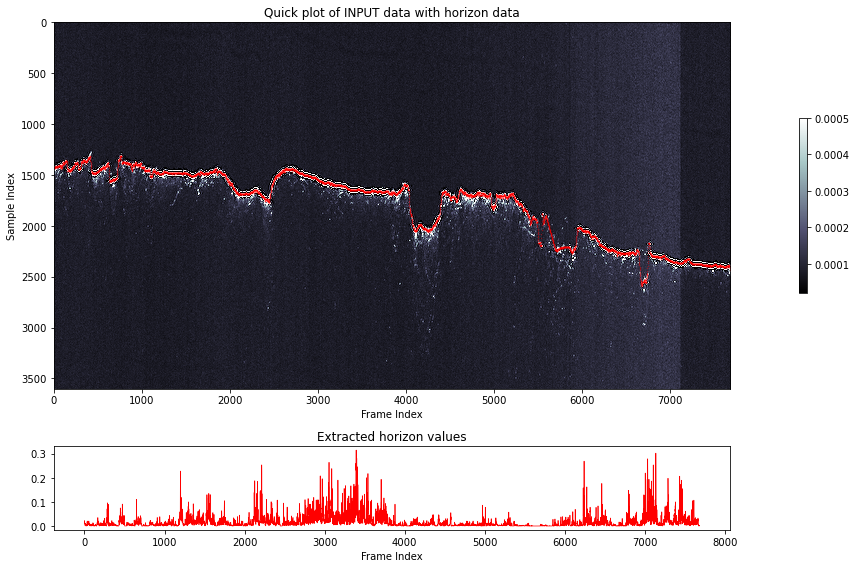

In [7]:
# We can also utilize .img data rather than .sgy data. A primitive
# auto-detection can be performed to provide an estimate of the
# surface return location, and controlled by the `jump_threshold`
# and `iterations` arguments


# .img data pulled from PDS
testing_img_path = './s_06519401_rgram.img'


# Using the `.from_img` method to create an
# instance of the LossTanGram class
tutorial_losstangram_img = Make_LossTanGram.from_img(testing_img_path)


# Plotting the data, using the auto-detected 
# first return
tutorial_losstangram_img.plot_data(vmin=0.00002, vmax=0.0005, horizon_size=0.6, 
                                   auto_surface=True, jump_threshold=30, iterations=2)

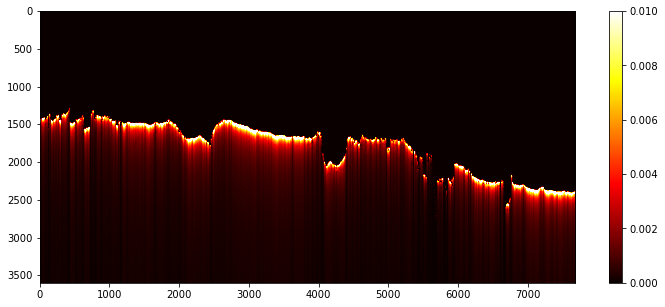

In [6]:
# We can also call the `loss_tangent()` method on the .img
# data, and specify to use the auto detected surface in
# the attribute calculation


loss_tangent_img = tutorial_losstangram_img.loss_tangent(auto_surface=True)

plt.figure(figsize=(12,5))
plt.imshow(loss_tangent_img.T, aspect='auto',vmin=0, vmax=.01, cmap='hot')
plt.colorbar()
plt.show()